In [76]:
from src.datasets import NoisySpeechDataset, AugmentedSpeechDataset
from src.utils import checkpoint
from src.utils.notebook import Sampler, visualize_audio 

In [135]:
dataset = NoisySpeechDataset(train=False, quiet=True)

In [176]:
# CHECKPOINT = 'wave-u-net-new-baseline-1573206080.full.ckpt'  # GAN + FL baseline 24 epochs
CHECKPOINT = 'wave-u-net-two-time-update-rule-1573252521.full.ckpt' # TTUR
# CHECKPOINT = 'wave-u-net-mse-gan-feature-losses-1573224098.full.ckpt' # MSE + GAN + FL 30 epochs
# CHECKPOINT = 'wave-u-net-mse-on-augmented-data-1573230800.full.ckpt' # MSE on augmented, 30 epochs
# CHECKPOINT = 'wave-u-net-mse-onlyy-1573200273.full.ckpt' # MSE loss only, 30 epochs
# CHECKPOINT = 'wave-u-net-feature-loss-only-1573203595.full.ckpt' # FL only, 18 epochs

In [177]:
net = checkpoint.load(CHECKPOINT, use_cuda=False)
net = net.eval()
sampler = Sampler(net, dataset)

In [178]:
# DOWNLOAD = '/home/matt/Downloads/indicator.resampled.wav'
# noisy_arr, pred_clean, pred_noise = sampler.get_results_from_file(DOWNLOAD, start=0)#2**18)

In [179]:
noisy_arr, clean_arr, pred_clean, pred_noise, true_noise = sampler.get_results(5)

Predicted clean signal


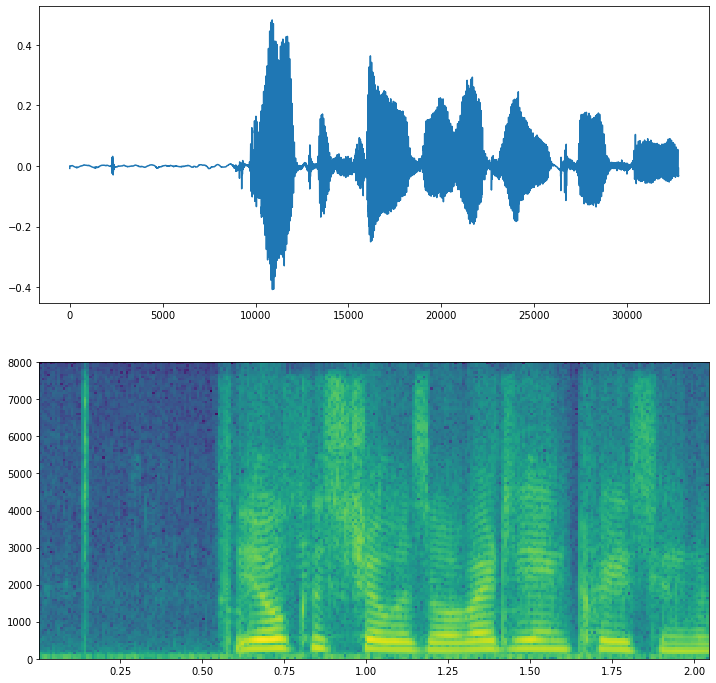

In [180]:
visualize_audio(pred_clean, 'Predicted clean signal')

Clean signal


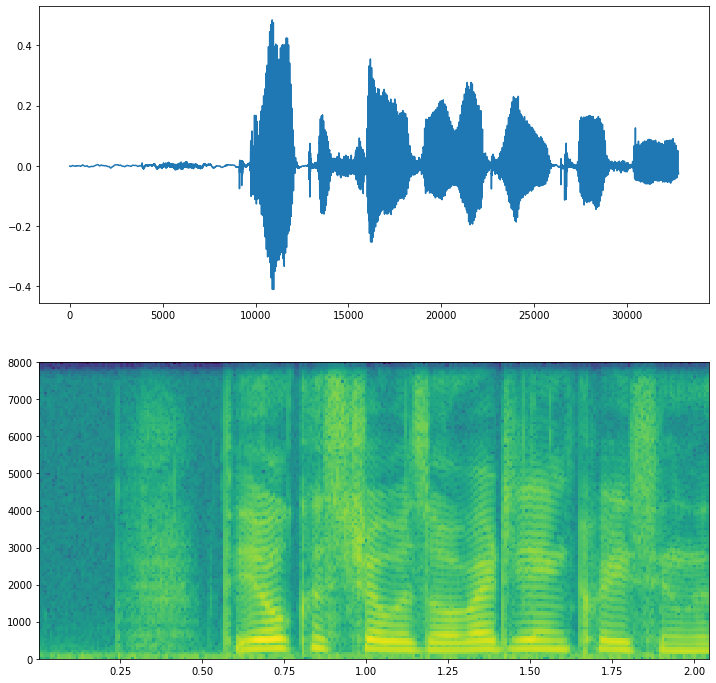

In [162]:
visualize_audio(clean_arr, 'Clean signal')

Noisy signal


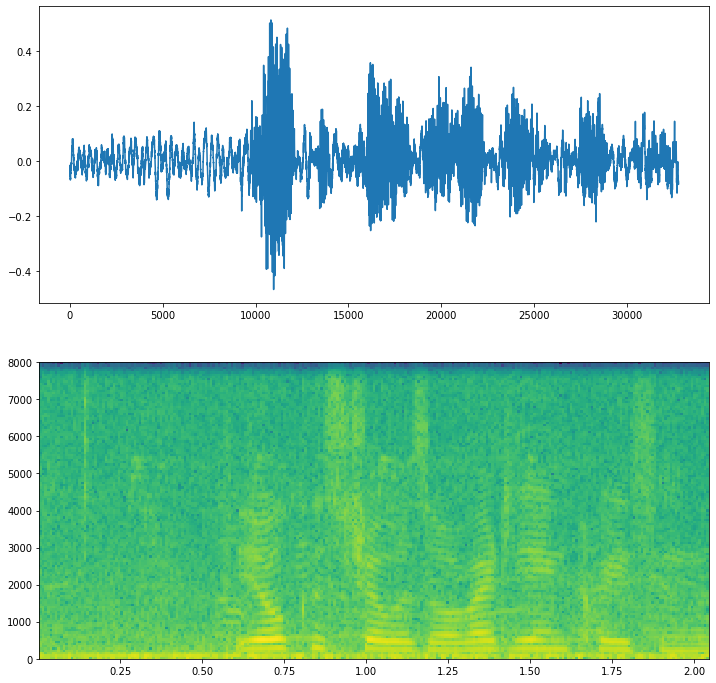

In [163]:
visualize_audio(noisy_arr, 'Noisy signal')

Predicted noise


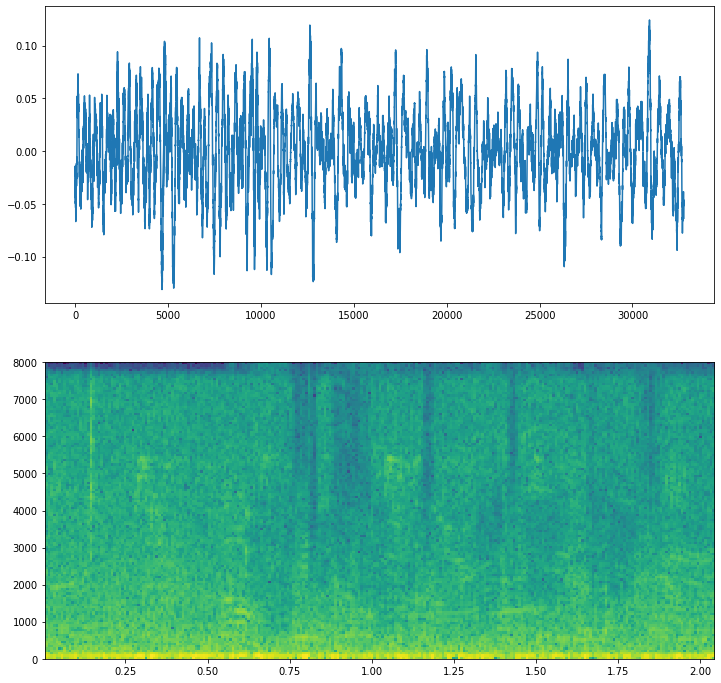

In [164]:
visualize_audio(pred_noise, 'Predicted noise')

True noise signal


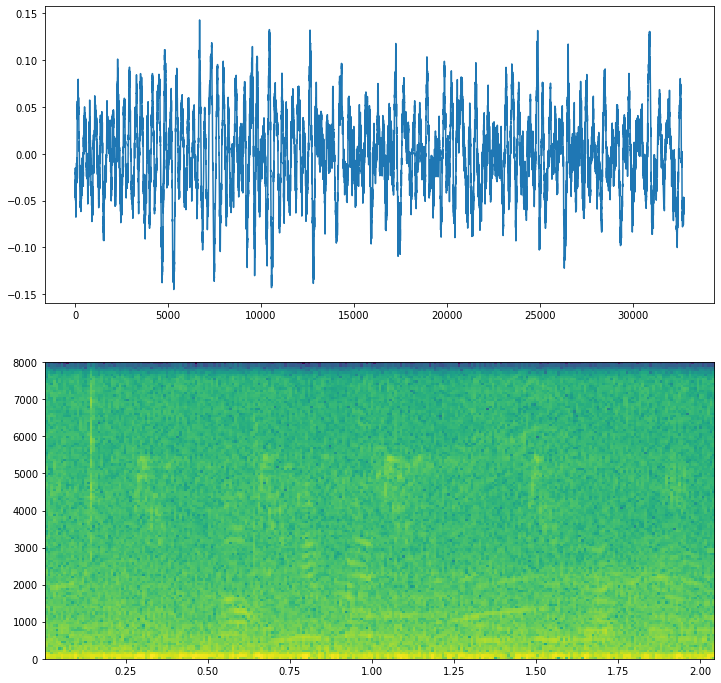

In [165]:
visualize_audio(true_noise, 'True noise signal')